In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.signal as signal
import numba
from numba import jit
import popdyn
import popdyn.convolve as cv
import copy
from importlib import reload

In [14]:
map_oceans = plt.imread("../maps/LOTR_MAPS_oceans.png")
map_rivers = plt.imread("../maps/LOTR_MAPS_rivers.png")
map_hills = plt.imread("../maps/LOTR_MAPS_hills.png")
map_mountains = plt.imread("../maps/LOTR_MAPS_mountains.png")
map_ridges = plt.imread("../maps/LOTR_MAPS_ridges.png")

wmap_oceans = popdyn.reader.extract_weightmap(map_oceans)
wmap_rivers = popdyn.reader.extract_weightmap(map_rivers)
wmap_hills = popdyn.reader.extract_weightmap(map_hills)
wmap_mountains = popdyn.reader.extract_weightmap(map_mountains)
wmap_ridges = popdyn.reader.extract_weightmap(map_ridges)

wmap_land = popdyn.reader.invert_weightmap(wmap_oceans)

In [15]:
raw_elevation = np.load("lotr_map_raw_elevation.npz")["arr_0"]

In [21]:
reload(cv)

<module 'popdyn.convolve' from '/home/vtn/PROJECTS/popdyn/popdyn/convolve.py'>

In [22]:
tmp_v = cv.convolve_map(raw_elevation, which='sobel_v')
tmp_h = cv.convolve_map(raw_elevation, which='sobel_h')
tmp_l = cv.convolve_map(raw_elevation, which='laplace')

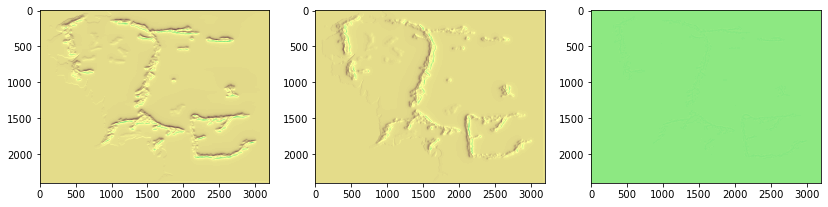

In [24]:
fig, axarr = plt.subplots(ncols=3, figsize=(14, 6))

axarr[0].imshow(tmp_v, cmap=plt.cm.terrain)
axarr[1].imshow(tmp_h, cmap=plt.cm.terrain)
axarr[2].imshow(tmp_l, cmap=plt.cm.terrain)

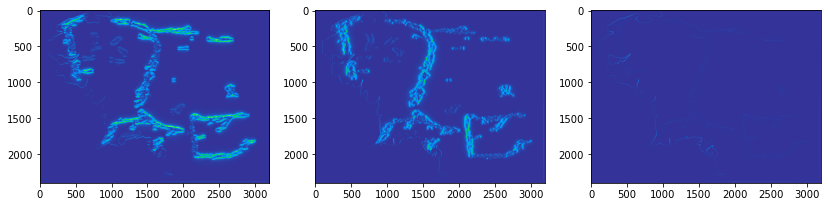

In [25]:
fig, axarr = plt.subplots(ncols=3, figsize=(14, 6))

axarr[0].imshow(np.abs(tmp_v), cmap=plt.cm.terrain)
axarr[1].imshow(np.abs(tmp_h), cmap=plt.cm.terrain)
axarr[2].imshow(np.abs(tmp_l), cmap=plt.cm.terrain)

In [32]:
(raw_elevation - 0.01 * tmp_v).max()

4680.516848602242

In [33]:
raw_elevation.max()

4679.161516894763

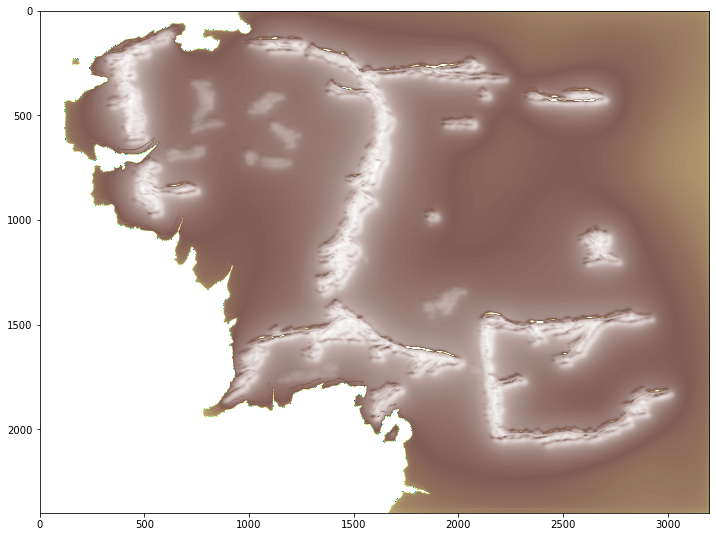

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow((raw_elevation - 0.001 * np.abs(tmp_v * raw_elevation)) - 1, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())